In [1]:
import pandas as pd

In [2]:
!git clone https://github.com/mwolfe03/ChemRiskPredict.git
%cd ChemRiskPredict

Cloning into 'ChemRiskPredict'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 103 (delta 59), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (103/103), 292.07 KiB | 2.63 MiB/s, done.
Resolving deltas: 100% (59/59), done.
/content/ChemRiskPredict


In [3]:
!pip install -U git+https://github.com/mwolfe03/ChemRiskPredict.git
%cd ChemRiskPredict

  Cloning https://github.com/mwolfe03/ChemRiskPredict.git to /tmp/pip-req-build-pefav931
  Running command git clone --filter=blob:none --quiet https://github.com/mwolfe03/ChemRiskPredict.git /tmp/pip-req-build-pefav931
  Resolved https://github.com/mwolfe03/ChemRiskPredict.git to commit 6bcf80d57b911bc92060f41b4f08ec5f019345ec
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.9/34.9 MB 10.7 MB/s eta 0:00:00
  Created wheel for ChemRiskPredict: filename=ChemRiskPredict-1.0.0-py3-none-any.whl size=1269 sha256=c47552af13c46983f06733fd08fa3ec28c1a7703aff0178f5a60da0ce29ab70a
  Stored in directory: /tmp/pip-ephem-wheel-cache-ckjbpd32/wheels/de/cb/45/173ab6797cb4582d108c6016a3a7cd497ee08ef29081d99504
Successfully built ChemRiskPredict
[Errno 2] No such file or directory: 'ChemRiskPredict'
/content/ChemRiskPredict


In [4]:
import ChemRiskPredict as chemrp

## Exploration of common substituents among different hazards
Since the Challenge of this project is to limit our model to only using the SMILES structure of molecules and data we are are able to extract from it, our data is most of our data is limited to 0s and 1s. Some hashes (groups/group pairings) appear multiple times in a molecule and thus would be greater than 1, but we decided to convert those values to 1 since we were worried that common groups that appear more than once in molecules such as "C" may disrupt our model. (the subgroups and subgroup pairs) Note that since column names are hashes, and hashing is one directional, there is no good way of retrieving what structure the hashs represent. That feature is something I want to add to the repository at some poing over the summer.

What these graphs are meant to show is that there is a significant amount of repeats in most common hashes. This suggests that it might not be best to directly correlate a group itself with a hazard as a model using that method may consistently predict a molecule to have all of the hazards.

In [54]:
default_file = chemrp.default_data_df
df_cleaned = default_file.loc[:, ~default_file.columns.str.startswith('Unnamed')]
df_cleaned

,Compound ID,IUPAC Name,Canonical SMILES,Hazards,Irritant,HealthHazard,Flammable,EnvironmentalHazard,Corrosive,AcuteToxic,...,80913ee232144e6252ecd64ee14cddc3,e50c0e418de1bffe6ebe5cd9d77a1779,0a8a242b3aec4b643a5db5f20023a8dc,6f803c3f75396ccc4f8a852e9748e550,17404efb30fd2d13e83e084865eac2d7,952f01fa7453bcb9541920dbc0a6f575,244c147de5d960d5e46bc43c8fbc7113,b46ac342e982a82087c8d741dcbd0d57,52581e12ab259ea5c4c84bda6dfe6079,6bb7c7c19a8eced0ba1d57c4d13a0d8c
0,6584,methyl acetate,CC(=O)OC,"Flammable, Irritant, Flammable, Irritant, Flam...",1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5957,"[[(2R,3S,4R,5R)-5-(6-aminopurin-9-yl)-3,4-dihy...",C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)OP(...,Acute Toxic,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8956,"(8S,9S,10R,13S,14S,17S)-17-[(1S)-1-hydroxyethy...",CC(C1CCC2C1(CCC3C2CCC4=CC(=O)CCC34C)C)O,"Irritant, Health Hazard",1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6119,2-amino-2-methylpropanoic acid,CC(C)(C(=O)O)N,Irritant,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7609,"1,2-dichloro-4-(chloromethyl)benzene",C1=CC(=C(C=C1CCl)Cl)Cl,"Corrosive, Irritant",1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,3197,"N-[2,4,12,15,17,25-hexamethyl-27-methylsulfany...",CC1C(=O)N(C2CSC(C(C(=O)N(C(C(=O)OCC(C(=O)N1)NC...,"Acute Toxic, Health Hazard",0,1,0,0,0,1,...,0,0,0,6,0,0,0,0,0,0
123,878,methanethiol,CS,"Flammable, Compressed Gas, Acute Toxic, Enviro...",1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
124,6705,"1,5-dinitroanthracene-9,10-dione",C1=CC2=C(C(=C1)[N+](=O)[O-])C(=O)C3=C(C2=O)C(=...,Irritant,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,7624,"N,N-didodecyldodecan-1-amine",CCCCCCCCCCCCN(CCCCCCCCCCCC)CCCCCCCCCCCC,"Irritant, Health Hazard, Environmental Hazard,...",1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
columns_to_remove = ['Compound ID', 'IUPAC Name', 'Canonical SMILES', 'Hazards',
                     "Irritant",	"HealthHazard",	"Flammable",	"EnvironmentalHazard",
                     "Corrosive",	"AcuteToxic", "Explosive", "CompressedGas", "Oxidizer", "could_not_collect_grouping_data"]
df_cleaned_just_hashes = df_cleaned.drop(columns=columns_to_remove).clip(upper=1)

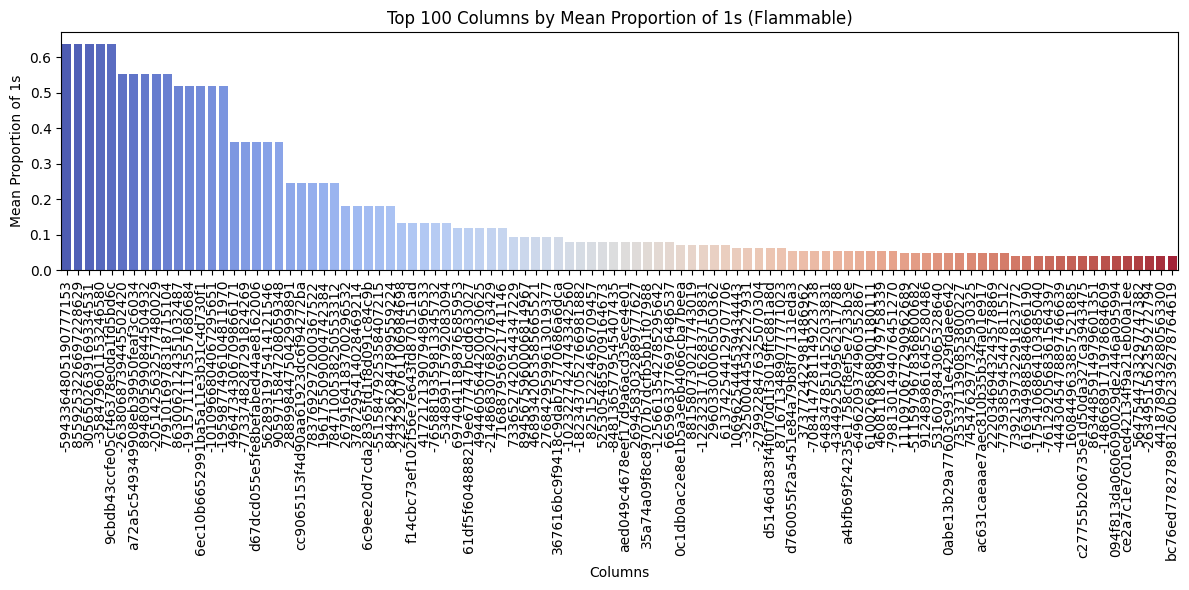

Top 10 Column Names:
-5943364805190777153
8559253226697228629
3056502639169334531
-358479601153246580
9cbdb43ccfe05cf46378e0da1fd5bd6c
-2638068739445502420
a72a5c549349908eb39950feaf3c6034
8948095990844504932
-2051425632577480029
7791016978318715104


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each column
column_means = df_cleaned_just_hashes.mean()


# Sort the means in descending order and select the top 100
top_100_means = column_means.sort_values(ascending=False).head(100)


# Create a bar plot for the top 100 columns
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_means.index, y=top_100_means.values, palette='coolwarm')

# Add title and labels
plt.title('Top 100 Columns by Mean Proportion of 1s (Flammable)')
plt.xlabel('Columns')
plt.ylabel('Mean Proportion of 1s')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate more for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Print the top 10 column names
top_10_columns = top_100_means.head(10).index
print("Top 10 Column Names:")
for column in top_10_columns:
    print(column)


This is very important to our project as it shows that there are infact repeats in substituents and that not every molecule contains only unique groups/ group combinations. It is interesting how the graph appears to drop in blocks of 5 initially. If I could undo the hash, a idea I would like to test is if those groups appear in the same molecules as a group.

In [44]:
df_flammable = df_cleaned[df_cleaned['Flammable'] == 1]
columns_to_remove = ['Compound ID', 'IUPAC Name', 'Canonical SMILES', 'Hazards',
                     "Irritant",	"HealthHazard",	"Flammable",	"EnvironmentalHazard",
                     "Corrosive",	"AcuteToxic", "Explosive", "CompressedGas", "Oxidizer", "could_not_collect_grouping_data"]
df_flammable_cleaned = df_flammable.drop(columns=columns_to_remove).clip(upper=1)
df_flammable_cleaned.head()

,-8481365779545407435,8559253226697228629,9059715847208059348,9124898616455280486,8630062124351032487,680173738947214279,7720970286183798108,-8928729647756456900,-4391482378748540561,8948095990844504932,...,80913ee232144e6252ecd64ee14cddc3,e50c0e418de1bffe6ebe5cd9d77a1779,0a8a242b3aec4b643a5db5f20023a8dc,6f803c3f75396ccc4f8a852e9748e550,17404efb30fd2d13e83e084865eac2d7,952f01fa7453bcb9541920dbc0a6f575,244c147de5d960d5e46bc43c8fbc7113,b46ac342e982a82087c8d741dcbd0d57,52581e12ab259ea5c4c84bda6dfe6079,6bb7c7c19a8eced0ba1d57c4d13a0d8c
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


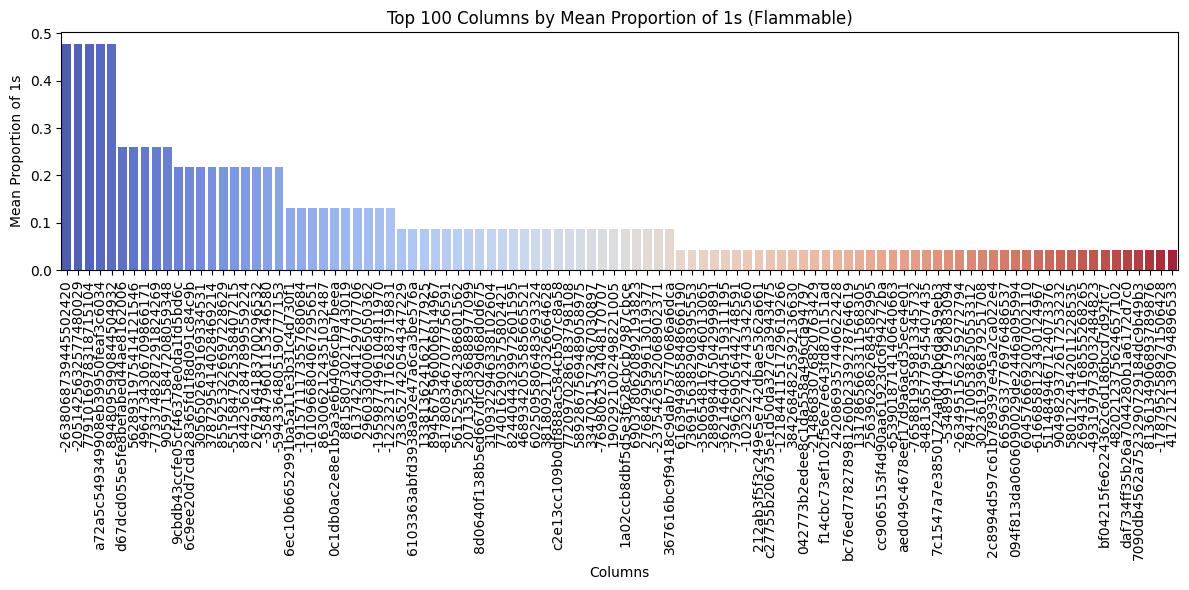

Top 10 Column Names:
-2638068739445502420
-2051425632577480029
7791016978318715104
a72a5c549349908eb39950feaf3c6034
8948095990844504932
d67dcd055e5fe8befabed44ae8162006
5628931975414121546
4964734306709866171
-7733748287291824269
9059715847208059348


In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each column
column_means = df_flammable_cleaned.mean()


# Sort the means in descending order and select the top 100
top_100_means = column_means.sort_values(ascending=False).head(100)


# Create a bar plot for the top 100 columns
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_means.index, y=top_100_means.values, palette='coolwarm')

# Add title and labels
plt.title('Top 100 Columns by Mean Proportion of 1s (Flammable)')
plt.xlabel('Columns')
plt.ylabel('Mean Proportion of 1s')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate more for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Print the top 10 column names
top_10_columns = top_100_means.head(10).index
print("Top 10 Column Names:")
for column in top_10_columns:
    print(column)


In [46]:
df_corrosive = df_cleaned[df_cleaned["Corrosive"] == 1]
columns_to_remove = ['Compound ID', 'IUPAC Name', 'Canonical SMILES', 'Hazards',
                     "Irritant",	"HealthHazard",	"Flammable",	"EnvironmentalHazard",
                     "Corrosive",	"AcuteToxic", "Explosive", "CompressedGas", "Oxidizer", "could_not_collect_grouping_data"]
df_corrosive_cleaned = df_corrosive.drop(columns=columns_to_remove).clip(upper=1)
df_corrosive_cleaned.head()

,-8481365779545407435,8559253226697228629,9059715847208059348,9124898616455280486,8630062124351032487,680173738947214279,7720970286183798108,-8928729647756456900,-4391482378748540561,8948095990844504932,...,80913ee232144e6252ecd64ee14cddc3,e50c0e418de1bffe6ebe5cd9d77a1779,0a8a242b3aec4b643a5db5f20023a8dc,6f803c3f75396ccc4f8a852e9748e550,17404efb30fd2d13e83e084865eac2d7,952f01fa7453bcb9541920dbc0a6f575,244c147de5d960d5e46bc43c8fbc7113,b46ac342e982a82087c8d741dcbd0d57,52581e12ab259ea5c4c84bda6dfe6079,6bb7c7c19a8eced0ba1d57c4d13a0d8c
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11,0,1,1,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


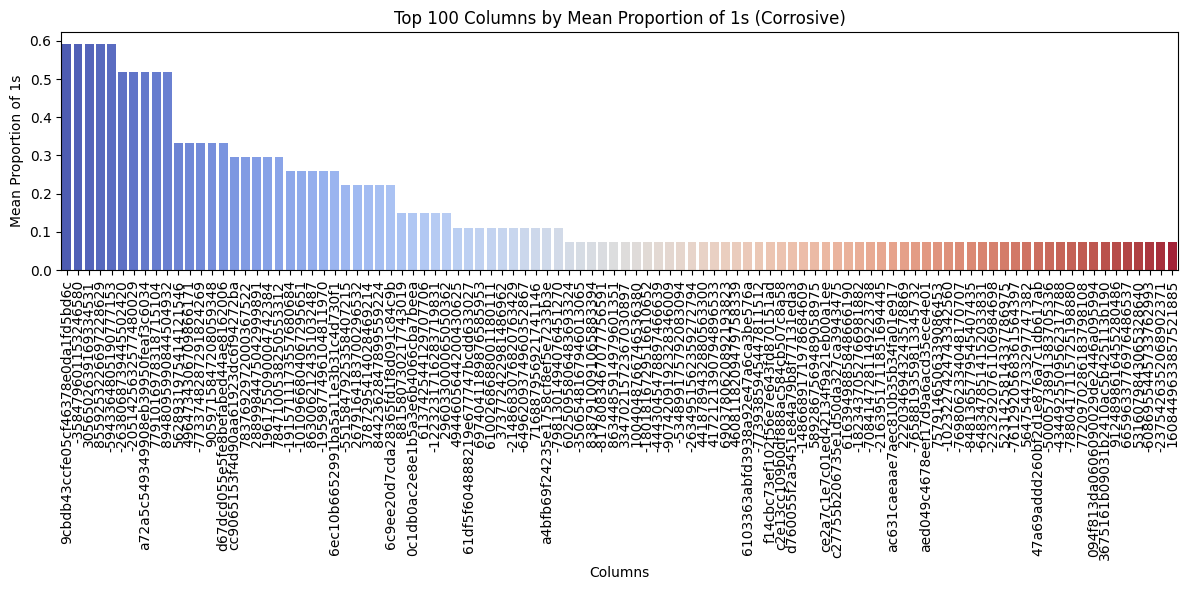

Top 10 Column Names:
9cbdb43ccfe05cf46378e0da1fd5bd6c
-358479601153246580
3056502639169334531
8559253226697228629
-5943364805190777153
-2638068739445502420
-2051425632577480029
a72a5c549349908eb39950feaf3c6034
7791016978318715104
8948095990844504932


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each column
column_means = df_corrosive_cleaned.mean()


# Sort the means in descending order and select the top 100
top_100_means = column_means.sort_values(ascending=False).head(100)


# Create a bar plot for the top 100 columns
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_means.index, y=top_100_means.values, palette='coolwarm')

# Add title and labels
plt.title('Top 100 Columns by Mean Proportion of 1s (Corrosive)')
plt.xlabel('Columns')
plt.ylabel('Mean Proportion of 1s')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate more for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Print the top 10 column names
top_10_columns = top_100_means.head(10).index
print("Top 10 Column Names:")
for column in top_10_columns:
    print(column)


In [48]:
df_EnvironmentalHazard = df_cleaned[df_cleaned["EnvironmentalHazard"] == 1]
columns_to_remove = ['Compound ID', 'IUPAC Name', 'Canonical SMILES', 'Hazards',
                     "Irritant",	"HealthHazard",	"Flammable",	"EnvironmentalHazard",
                     "Corrosive",	"AcuteToxic", "Explosive", "CompressedGas", "Oxidizer", "could_not_collect_grouping_data"]
df_EnvironmentalHazard_cleaned = df_EnvironmentalHazard.drop(columns=columns_to_remove).clip(upper=1)
df_EnvironmentalHazard_cleaned.head()

,-8481365779545407435,8559253226697228629,9059715847208059348,9124898616455280486,8630062124351032487,680173738947214279,7720970286183798108,-8928729647756456900,-4391482378748540561,8948095990844504932,...,80913ee232144e6252ecd64ee14cddc3,e50c0e418de1bffe6ebe5cd9d77a1779,0a8a242b3aec4b643a5db5f20023a8dc,6f803c3f75396ccc4f8a852e9748e550,17404efb30fd2d13e83e084865eac2d7,952f01fa7453bcb9541920dbc0a6f575,244c147de5d960d5e46bc43c8fbc7113,b46ac342e982a82087c8d741dcbd0d57,52581e12ab259ea5c4c84bda6dfe6079,6bb7c7c19a8eced0ba1d57c4d13a0d8c
7,0,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
13,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


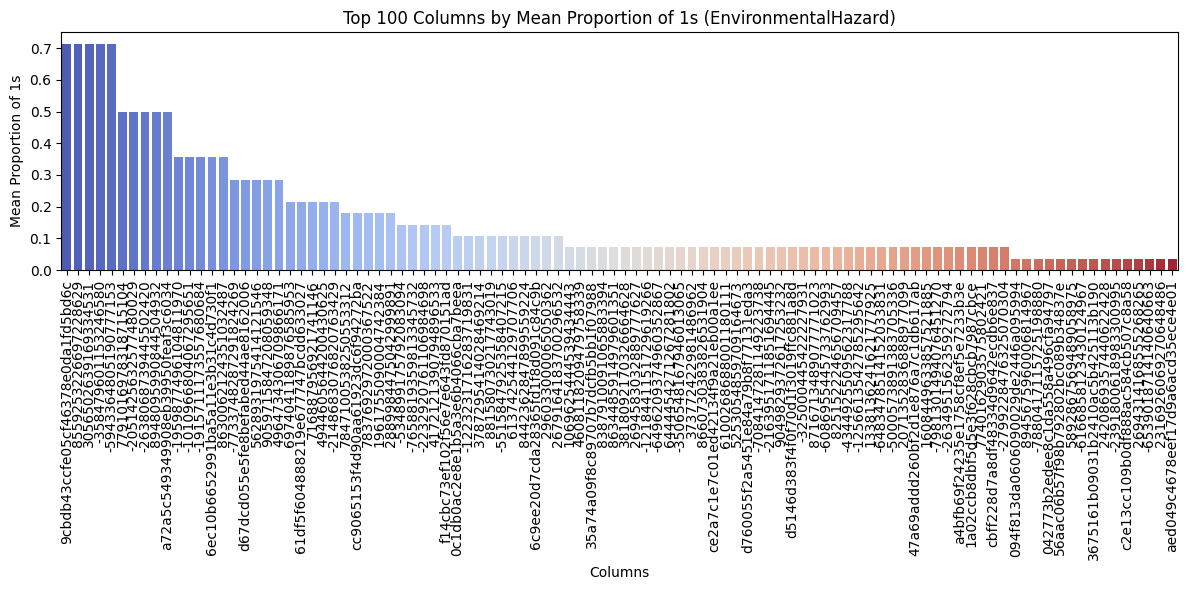

Top 10 Column Names:
9cbdb43ccfe05cf46378e0da1fd5bd6c
8559253226697228629
3056502639169334531
-358479601153246580
-5943364805190777153
7791016978318715104
-2051425632577480029
-2638068739445502420
8948095990844504932
a72a5c549349908eb39950feaf3c6034


In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the mean of each column
column_means = df_EnvironmentalHazard_cleaned.mean()

# Sort the means in descending order and select the top 100
top_100_means = column_means.sort_values(ascending=False).head(100)


# Create a bar plot for the top 100 columns
plt.figure(figsize=(12, 6))
sns.barplot(x=top_100_means.index, y=top_100_means.values, palette='coolwarm')

# Add title and labels
plt.title('Top 100 Columns by Mean Proportion of 1s (EnvironmentalHazard)')
plt.xlabel('Columns')
plt.ylabel('Mean Proportion of 1s')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)  # Rotate more for better readability

# Show the plot
plt.tight_layout()
plt.show()

# Print the top 10 column names
top_10_columns = top_100_means.head(10).index
print("Top 10 Column Names:")
for column in top_10_columns:
    print(column)


These graphs show that there are many similarities in subgroups and subgroup combinations among the molecules with certain hazards. One important thing to note is then when intially collecting the data, there was no good way to determine whether a molecule had no hazards listed because they were safe, or because they had not been any data collected on their hazards. We ended up dropping these molecules from the data set as it may have lead to many false negatives, leading hazardaus substances to be mislabeled as safe in our model. We also believed it would be bad practice to include data in our models when we were unsure on their properties.

The most important takeaway from this is that there are infact repeats in hashes, molecules share subgroups/ subgroup combinations and we can build a K nearest neighbor model based on the subgroup/ subgroup combinations (that were extracted from the SMILES string) to compare how similar molecules are. If all combinations were unique, then we would not have been able to use these hash groups to gain insight on what molecules are similar.